In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [2]:
df = pd.read_csv('reservationsN.csv')

# 1 - Distribution of Origin Countries of Reservation Makers

## Count the number of reservations by country

In [4]:
country_counts = df['country'].value_counts()

# Only top 15 countries to make it more pleasing for the eyes
top_countries = country_counts.head(15)

num_slices = len(top_countries)

## Plot the pie chart

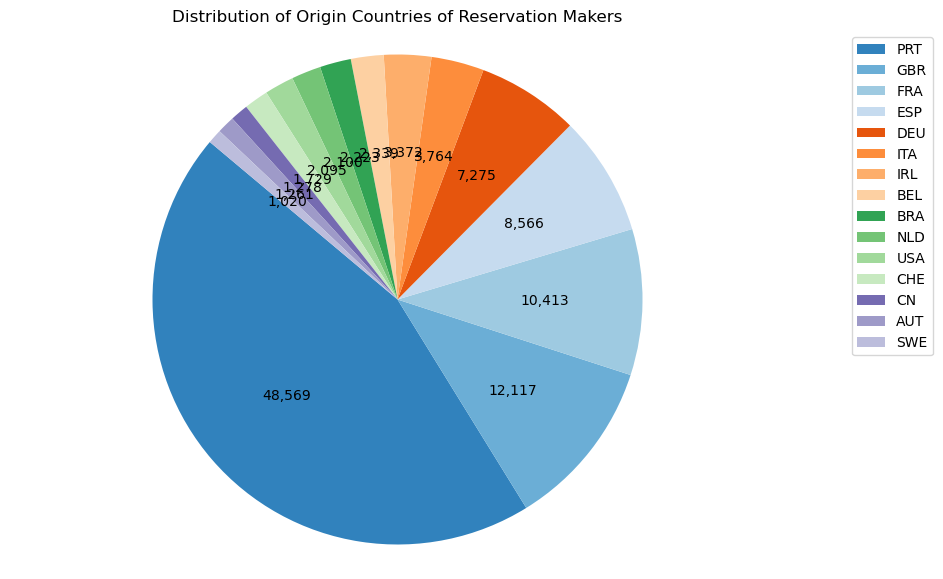

In [5]:
# Color scheme
cmap = plt.get_cmap('tab20c')
colors = cmap(range(num_slices))

# Pie and legend configurations
plt.figure(figsize=(10, 7))
plt.pie(top_countries, labels=None, autopct=lambda pct: f'{int(pct/100 * sum(top_countries)):,d}',colors=colors, startangle=140)
plt.title('Distribution of Origin Countries of Reservation Makers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=top_countries.index, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

-------

# 2 - Distribution of Reservations by Nights Category

## Calculate nights_category and total_rows fields

In [6]:
# Function to categorize reservations based on nights
def categorize_nights(row):
    if row['weekendnights'] > 0 and row['weeknights'] == 0:
        return 'Weekendnight Only'
    elif row['weekendnights'] == 0 and row['weeknights'] > 0:
        return 'Weeknights Only'
    elif row['weekendnights'] > 0 and row['weeknights'] > 0:
        return 'Both Nights'
    else:
        ''

# Function to calculate total rows
def calculate_total_rows(row):
    return 1

## Group reservations by nights category

In [7]:
# Apply the function to create a new column 'Num of Nights Category'
df['Num of Nights Category'] = df.apply(categorize_nights, axis=1)

# Apply the function to create a new column 'Total amount of rows'
df['Total amount of rows'] = df.apply(calculate_total_rows, axis=1)

# Group by 'Num of Nights Category' and sum 'Total amount of rows'
reservation_counts = df.groupby('Num of Nights Category')['Total amount of rows'].sum()

## Plot the graph

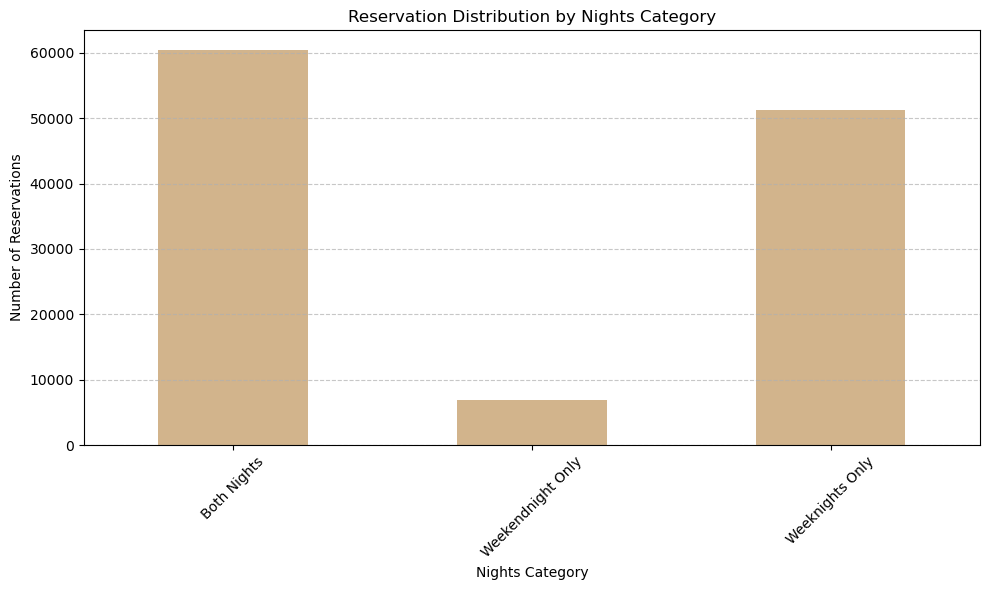

In [8]:
# Plotting the bar graph for reservations by category
plt.figure(figsize=(10, 6))
reservation_counts.plot(kind='bar', color='#D2B48C')
plt.title('Reservation Distribution by Nights Category')
plt.xlabel('Nights Category')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-------

# 3 - Division into Market based on Revenue

## Calculate revenue function

In [9]:
# Define a function to calculate revenue
def calculate_revenue(row):
    if row['stat'] == "Check-Out" or row['deposit'] == "Non Refund":
        return row['DailyAVG'] * (row['weeknights'] + row['weekendnights'])
    else:
        return 0

## Group market segments by revenue

In [10]:
# Apply function to create a new column in df
df['revenue'] = df.apply(calculate_revenue, axis=1)

# Group by 'market_segment' and sum 'revenue'
segment_revenue = df.groupby('market')['revenue'].sum()

# Remove any segments where revenue is 0 (optional)
segment_revenue = segment_revenue[segment_revenue != 0]

num_slices = len(segment_revenue)

## Plot the pie chart

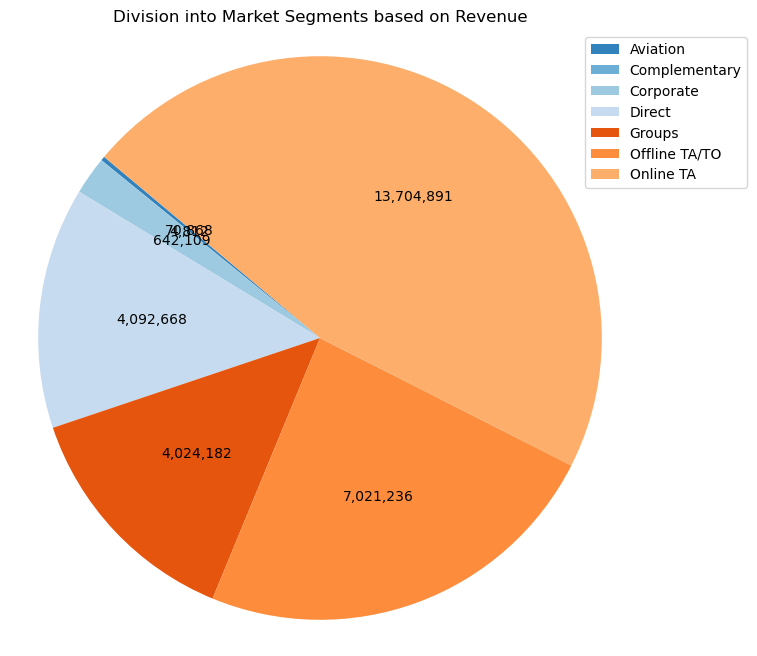

In [11]:
# Color scheme
cmap = plt.get_cmap('tab20c')
colors = cmap(range(num_slices))

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_revenue, labels=None, autopct=lambda pct: f'{int(pct/100 * sum(segment_revenue)):,d}', startangle=140, colors=colors)
plt.title('Division into Market Segments based on Revenue')
plt.axis('equal')
plt.legend(labels=segment_revenue.index, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

-------

# 4 - Distribution of Cancelled Reservations by Weekday

## Calculate day_of_week and cancelled_orders fields

In [12]:
# Function to calculate 'Day's week'
def calculate_day_of_week(date_str):
    return pd.to_datetime(date_str).day_name()

# Function to calculate 'Cancelled orders'
def calculate_cancelled_orders(cancel_status):
    return 1 if cancel_status == 'yes' else 0

## Group weekdays by cancelled orders

In [13]:
# Apply functions to create new columns in df
df['Day\'s week'] = df['statD'].apply(calculate_day_of_week)
df['Cancelled orders'] = df['cancel'].apply(calculate_cancelled_orders)

# Group by 'Day's week' and sum 'Cancelled orders'
cancelled_by_weekday = df.groupby('Day\'s week')['Cancelled orders'].sum().reindex([ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

## Plot the graph

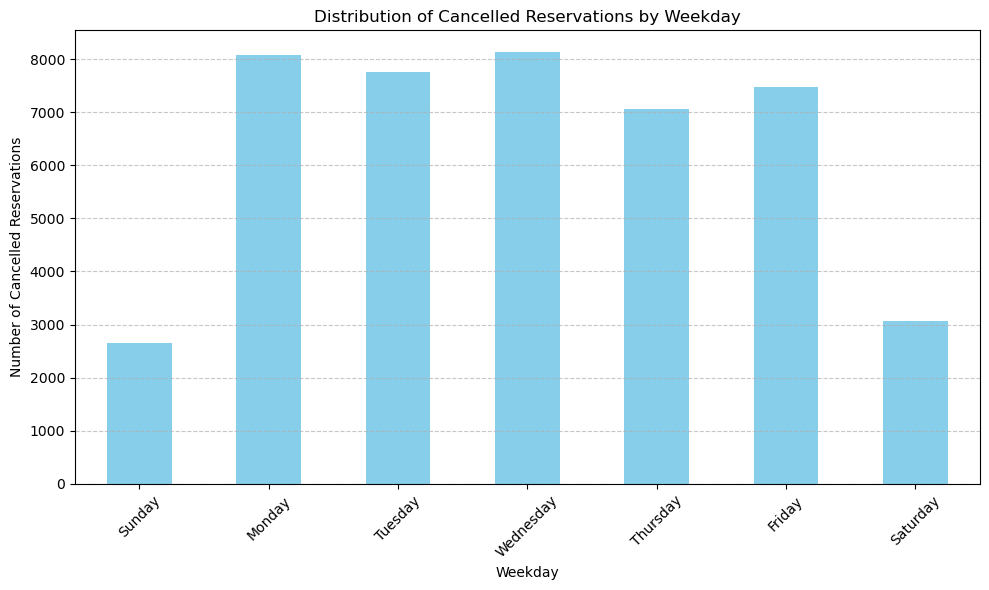

In [14]:
# Plotting the bar chart for cancelled reservations by weekday
plt.figure(figsize=(10, 6))
cancelled_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cancelled Reservations by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Cancelled Reservations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()